# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return 0.01*(x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7)

In [15]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
  f_x = []
  for i in range(len(x1)):
    for j in range(len(x2)):
      f_x.append(f(np.asarray([[x1[i], x2[j]]])))
    
  return np.asarray(f_x).reshape(len(x1), len(x2))

In [16]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100., 100., 400)
x2 = np.linspace(-100., 100., 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

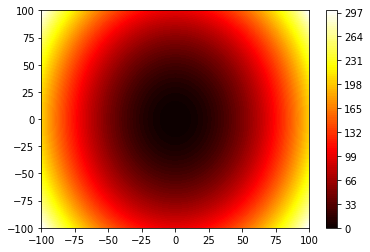

In [17]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap='hot')
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$?

**Answer:**
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &= 2x_{1} + (0.9 \pi )sin(3 \pi x_{1})  \\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4x_{2} + (1.6 \pi)sin(4 \pi x_{2}) \\
\end{align*}

In [18]:
#=========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
#=========
# Implement the gradient for the considered f(x).
def grad(x):
    #x is an array of two number so we assign the first value to x1 and the second value to x2
    x1 = x[0][0] 
    x2 = x[0][1]
    #array of the two derivatives
    grad = [2*x1 +0.9*np.pi*np.sin(3*np.pi*x1), #gradient x1
           4*x2 +1.6*np.pi*np.sin(4*np.pi*x2)]  #gradient x2
    return grad

In [19]:
#=========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
#=========
# Implement the gradient descent (GD) optimization algorithm. 
# It is equivalent to implementing the step function.
class GradientDescent(object):
  def __init__(self, grad, step_size=0.1):
    self.grad = grad
    self.step_size = step_size    

  def step(self, x_old):  
    #calculate the gradient at position x_old and tranform it in anumpy array
    array_grad = np.array(self.grad(x_old))
    #calculate the position of x 
    x_new = x_old-(array_grad * self.step_size)
    return x_new
    

In [20]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
  # Plot the objective function
  ax.contourf(x1, x2, f_x, 100, cmap='hot')

  # Init the solution
  x = np.asarray([[90., -90.]])
  x_opt = x
  # Run the optimization algorithm
  for i in range(num_epochs):
    x = optimizer.step(x)
    x_opt = np.concatenate((x_opt, x), 0)

  ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
  ax.set_title(title)

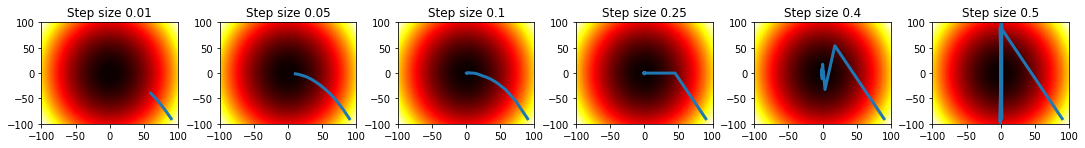

In [21]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20 # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
  # take the step size
  step_size = step_sizes[i]
  # init the GD
  gd = GradientDescent(grad, step_size=step_size)
  # plot the convergence
  plot_optimization_process(axs[i], optimizer=gd, title='Step size ' + str(gd.step_size))

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size.

**Answer**: With a step size of 0.05 and 0.1 the algorithm seems to have a similar performance and is able to reach the minimum of the gradient. 
Step size 0.25 is also similar to the smaller step sizes but reach the minimum of the gradient within two itineration. 
Step size 0.4 reach the minimum but it takes more iteration than 0.25 the performance is also not as smooth as the one with the lower step sizes. 
The two worst performing learnin rate are the lowest (0.01) were the algorithm get stuck and doesn't reach the minimum and the highest (0.5) which overshoot and doesn't reach the minimum as well. 


**Question 3 (0-0.5pt)**: Can we do something about the step size equal 0.01? What about the step size equal 0.5?

**Answer**: Yes. For the step size equal 0.01 we can increase the number of epochs, which would allow gradient-descent to move closer to the minimum. 
A way to prevent the algorithm with step size 0.5 from missing the local minimum is to store the value of x after each iteration. We could then modify the algorithm in a way that if it keeps getting stuck between two points (as we can see above in the behaviour of the gd with step size 0.5), the step size can gradually be decreased.

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great! 

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): The more complex the method, the higher the score! Please keep it in mind during developing your algorithm. TAs will also check whether the pseudocode is correct.*

**Answer:** 
PSEUDOCODE:

    number of iterations = N
    step size = s 
    objective function = f(x)
    for every i in N:
        Sample a new random_x point within the limit.
        step = random_x * s
        Get x_new = x_old - step
        Check if x_new is in search space by comparing the coordinate of the point to the limits of the search space.
        If x_new is in search space:
            Calculate f(x_old) and f(x_new)
            If f(x_new) <= f(x_old):
                return x_new
            else: return x_old 
        if x_new is not in search space return x_old

In [22]:
#import all necessary packages
from numpy.random import rand
from numpy import random
import random


In [72]:
#=========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
#=========
# Implement a derivative-free optimization (DFO) algorithm. 
# The objective function.
def f(x):
    return 0.01*(x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7)
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.
class DFO(object):
  def __init__(self, obj_fun, step_size, limits):
    self.obj_fun = obj_fun
    self.step_size = step_size
    self.limits = limits
  # This function MUST be implemented.
  # No additional arguments here!  
  

    # check if a point is within the bounds of the search
  def in_space(self, point, limits):
        # enumerate all dimensions of the point
        x = point[0]
        for d in range(len(limits)):
            # check if out of bounds for this dimension
            if x[d] < limits[d, 0] or x[d] > limits[d, 1]:
                return False
        return True

  def step(self, x_old):
    #get a random value
    rand_value = np.random.uniform(-100,100,2)
    #calculate the step which is given by a random value in the limited space times the step size
    step = rand_value*self.step_size
    #get the new value 
    x_value = x_old - step
    #check if the new point is contained in the limits of the search space
    if self.in_space(x_value, self.limits):
        #check if new value is better than old one, otherwise return the old
        if self.obj_fun(x_value) <=  self.obj_fun(x_old):
            x_new = x_value
        else: 
            x_new = x_old
        return x_new
    #if x_value not in the search space then return x_old
    else: 
        return x_old
    



In [73]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
  # Plot the objective function
  ax.contourf(x1, x2, f_x, 100, cmap='hot')

  # Init the solution
  x = np.asarray([[90., -90.]])
  x_opt = x
  # Run the optimization algorithm
  for i in range(num_epochs):
    x = optimizer.step(x)
    x_opt = np.concatenate((x_opt, x), 0)

  ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
  ax.set_title(title)

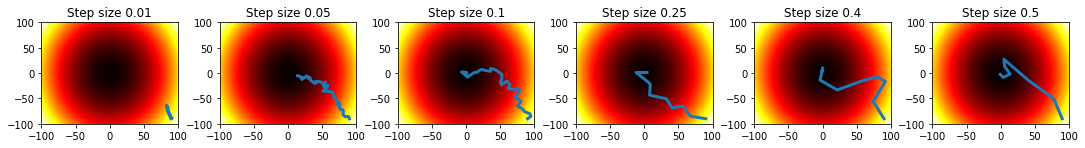

In [74]:
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
num_epochs = 100 # the number of epochs. I decided to use 100 as number of epochs to increase tha chances of reaching the minimum.
#set limits of searchspace
limits = np.asarray([[-100.0, 100.0], [-100.0, 100.0]])


# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the DFO algorithm with different step sizes
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

# plotting the convergence of the DFO
fig_gd, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
  step_size = step_sizes[i]
  # init the dfo
  dfo = DFO(f,step_size=step_size, limits=limits)
  # plot the convergence
  plot_optimization_process(axs[i], optimizer=dfo, title='Step size ' + str(dfo.step_size))


**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** 
The implemented dfo algorithm attempts to get closer to the local minimum at each iteration. It does so by getting a new value (obtained by a random value within the limit times the chosen step size) and then substract that to the old value of x. After this has been done it first check if the new value is contained in the limit of the search space and then decides wheter the new value is better than the old value of x by comparing the result of the two values on the objective function.
If the result of the objective function with the new location of x is lower, the new value is accepted.
The main strong point is that it is really easy to implement and does not require any calculus skill to be used due to the use of the random values. 
The main weakness of this algorithm is the randomness used for finding the local minimum. This means that this DFO needs a high number of epochs to increase the probability of getting anywhere near the local minimum. Moreover, since the steps are randomly sampled the results vary a lot from each other everytime. 
Increasing the value of the step size seems to help the performance. The algorithm doesn't encounter the same problems of the GD with a big step size, but get stuck on the side of a hill with a very low step size. 


## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: The main difference between the two algorithm is how they get closer to the local minimum. GD use the gradient of the objective function to optimize the model and minimize the loss and therefore requires less epochs and is more efficient and accurate than DFO. The implemented derivate free method, as the name suggests, do not use the derivative of the objective function but a random value which makes it less accurate and need more epochs to increase the probability of getting anywhere near the local minimum. 

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: The DFO it's easier to apply bacause it is not necessary to calculate the derivative of the function and just requires random number which are easy to obtain. Therefore it is also easier to implement, even though I personally found GD more easy to implement in this specific situation. 
In general Gradient descent is easy and efficient to implement in those cases where the derivative is easy to obtain.